# (1) Forest Fires

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\Assignment\Support Vector machines\forestfires.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...     ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0   

     daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  \
0         0       0       0       0       0       0         0         0   
1         0       0       0       0       1       0         0         0   
2         0       1       0       0       0       0         0         0   
3         0       0       0       0       0       0         0         0   
4         0       0       1       0       0       0         0         0   
..      ...     ...     ...     ...     ...     ...       ...       ...   
512       0       0       1       0       0       0         0         1   
513       0       0       1       0       0       0         0         1   
514       0       0       1       0       0       0         0         1   
515       0       1       0       0       0       0         0         1   
516       0       0       0       0       1       0         0         0   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep size_category  
0           0         0         0         small  
1           0         1         0         small  
2           0         1         0         small  
3           0         0         0         small  
4           0         0         0         small  
..        ...       ...       ...           ...  
512         0         0         0         large  
513         0         0         0         large  
514         0         0         0         large  
515         0         0         0         small  
516         1         0         0         small  

[517 rows x 31 columns]

In [5]:
df.drop(df.columns[11:-1], axis=1,inplace= True)

In [6]:
df.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area  
count  517.000000  517.000000   517.000000  
mean     4.017602    0.021663    12.847292  
std      1.791653    0.295959    63.655818  
min      0.400000    0.000000     0.000000  
25%      2.700000    0.000000     0.000000  
50%      4.000000    0.000000     0.520000  
75%      4.900000    0.000000     6.570000  
max      9.400000    6.400000  1090.840000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [8]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [9]:
df.duplicated().sum()

8

In [10]:
df[df.duplicated(keep=False)]

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
52    aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00   
53    aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00   
99    aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00   
100   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00   
214   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66   
215   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66   
302   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00   
303   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00   
425   aug  thu  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0   0.00   
426   aug  thu  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0   0.00   
460   aug  sat  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0   0.00   
461   aug  sat  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0   0.00   
500   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00   
501   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00   
507   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0   0.00   
508   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0   0.00   

    size_category  
52          small  
53          small  
99          small  
100         small  
214         large  
215         large  
302         small  
303         small  
425         small  
426         small  
460         small  
461         small  
500         small  
501         small  
507         small  
508         small

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
cat_cols = df.select_dtypes(object).columns

In [14]:
oe = OrdinalEncoder()
df[cat_cols] = oe.fit_transform(df[cat_cols])
df

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0      7.0  0.0  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1     10.0  5.0  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2     10.0  2.0  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3      7.0  0.0  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4      7.0  3.0  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..     ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512    1.0  3.0  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513    1.0  3.0  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514    1.0  3.0  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515    1.0  2.0  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516    9.0  5.0  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

     size_category  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0  
..             ...  
512            0.0  
513            0.0  
514            0.0  
515            1.0  
516            1.0  

[509 rows x 12 columns]

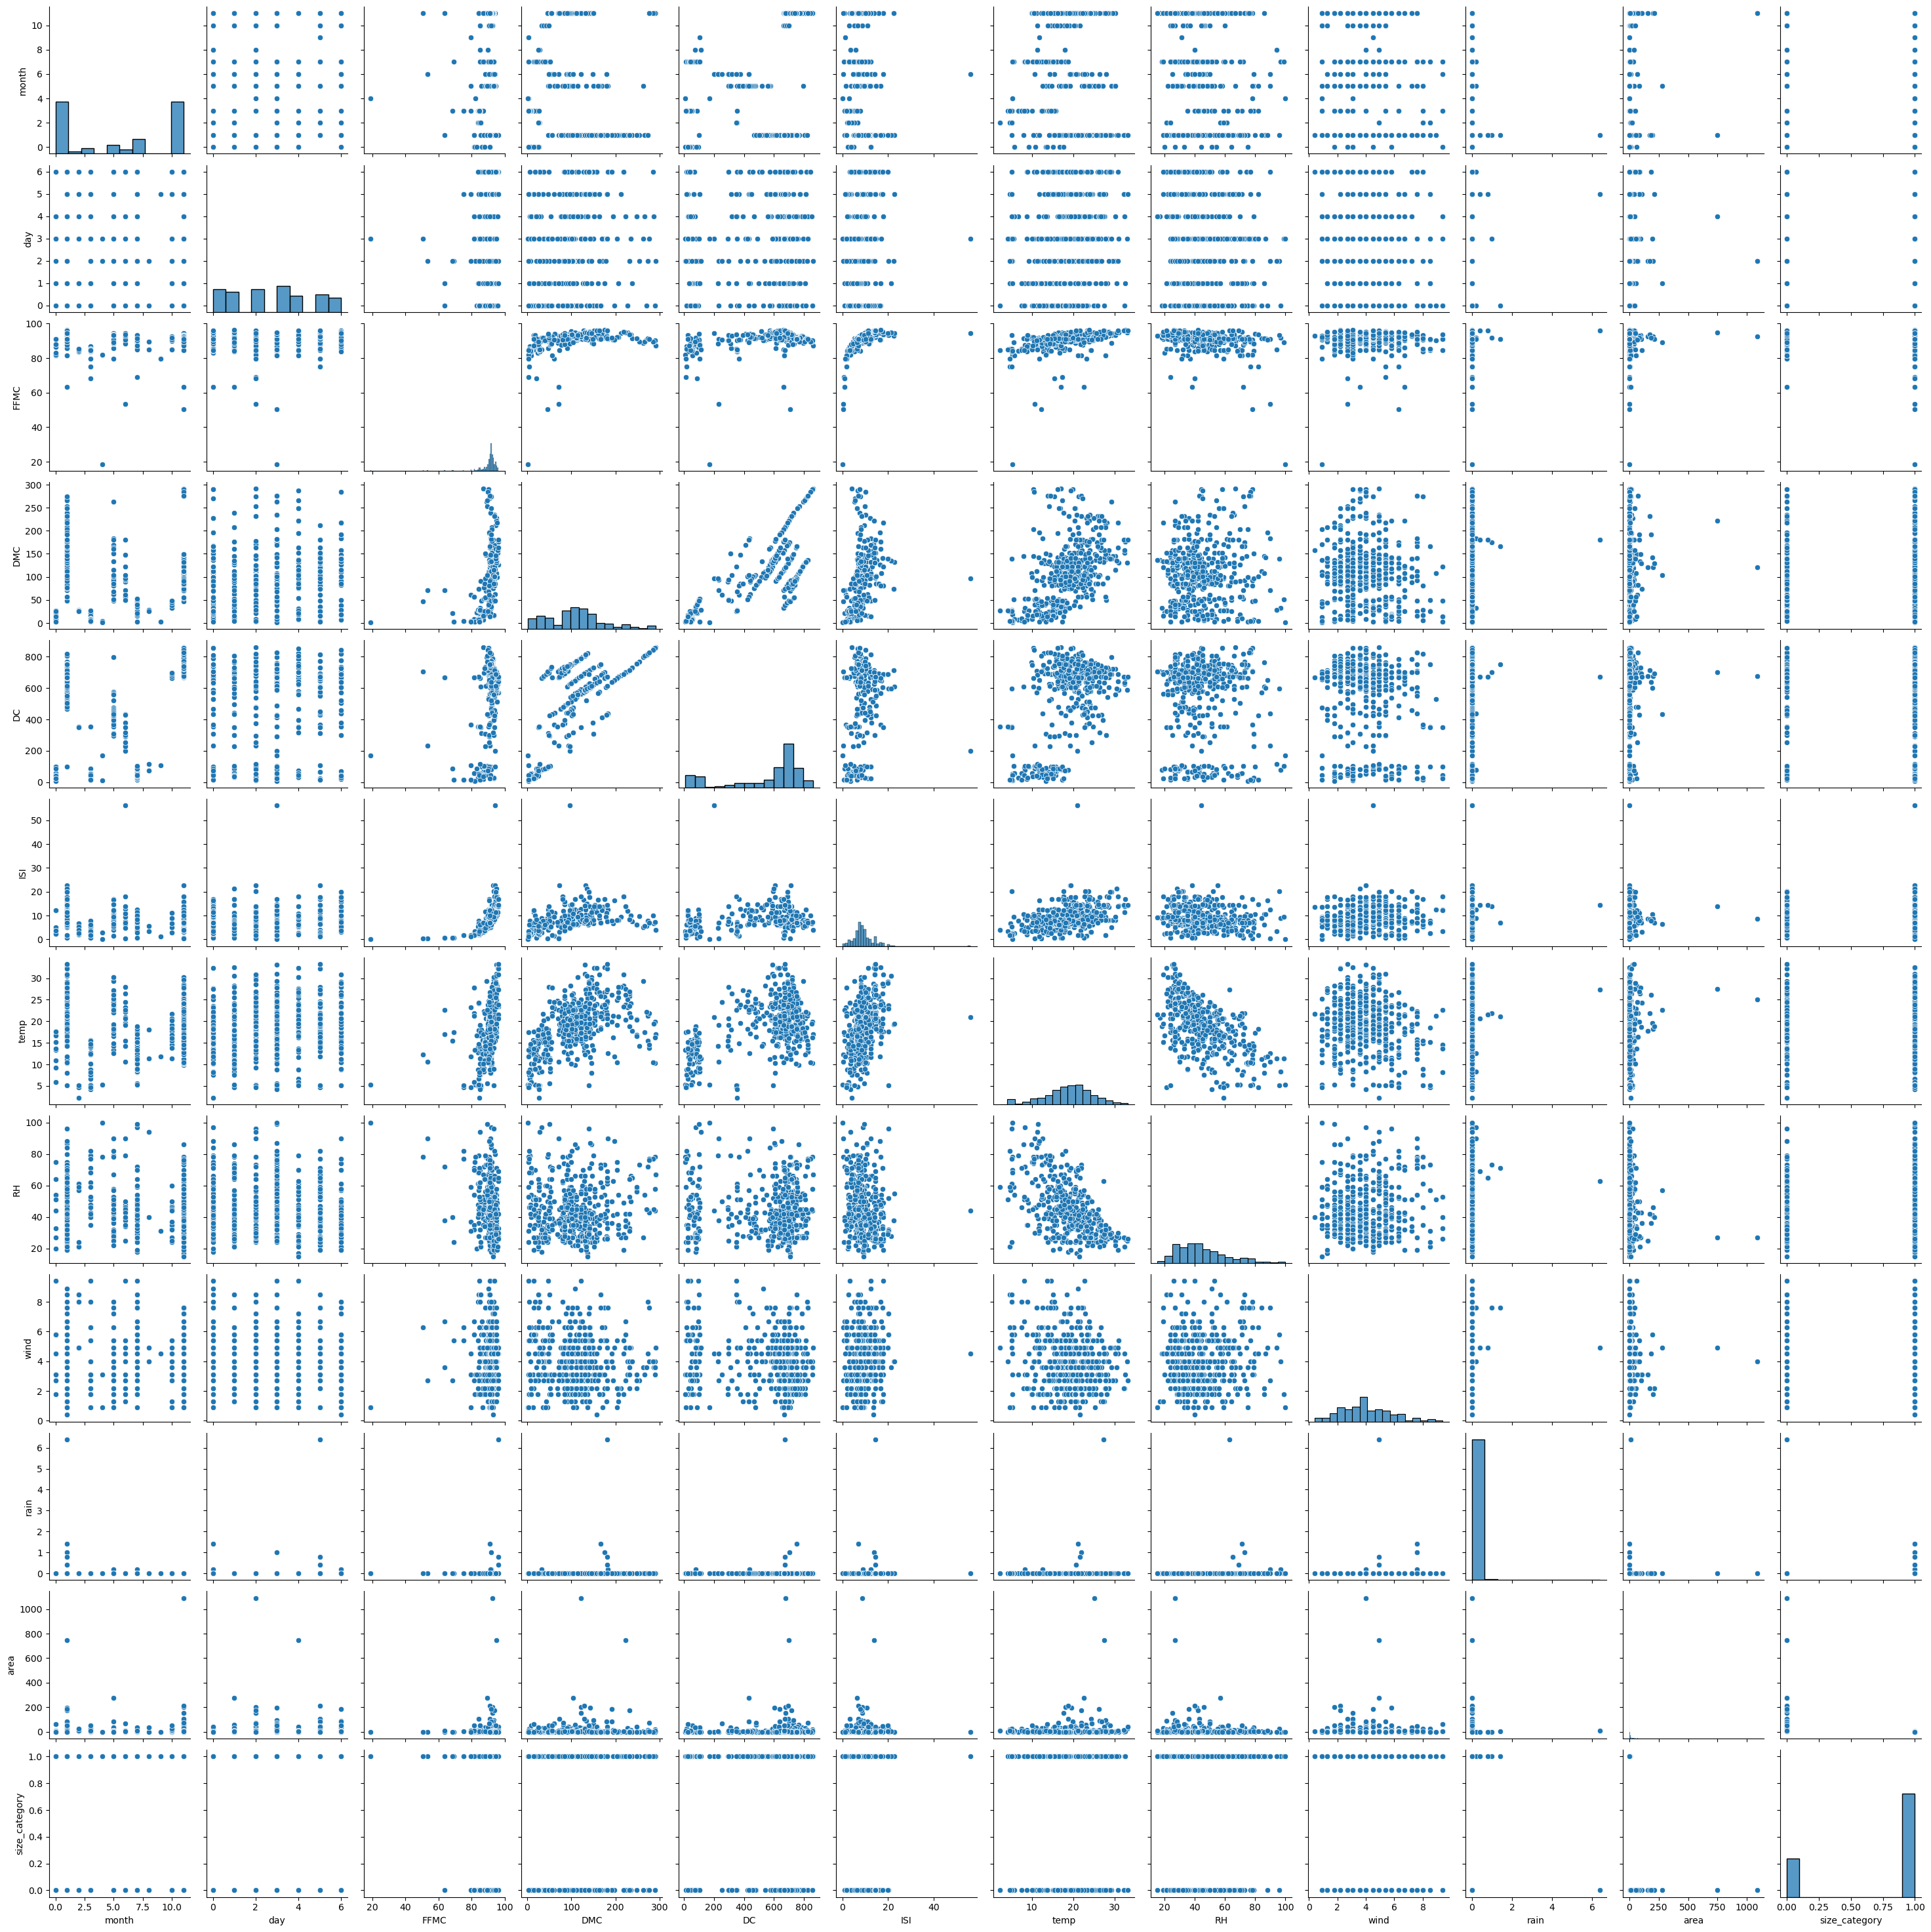

In [15]:
sns.pairplot(df)

In [16]:
plt.rcParams['figure.figsize'] = 10,6
plt.rcParams['figure.dpi'] = 250
plt.show()

<AxesSubplot: >

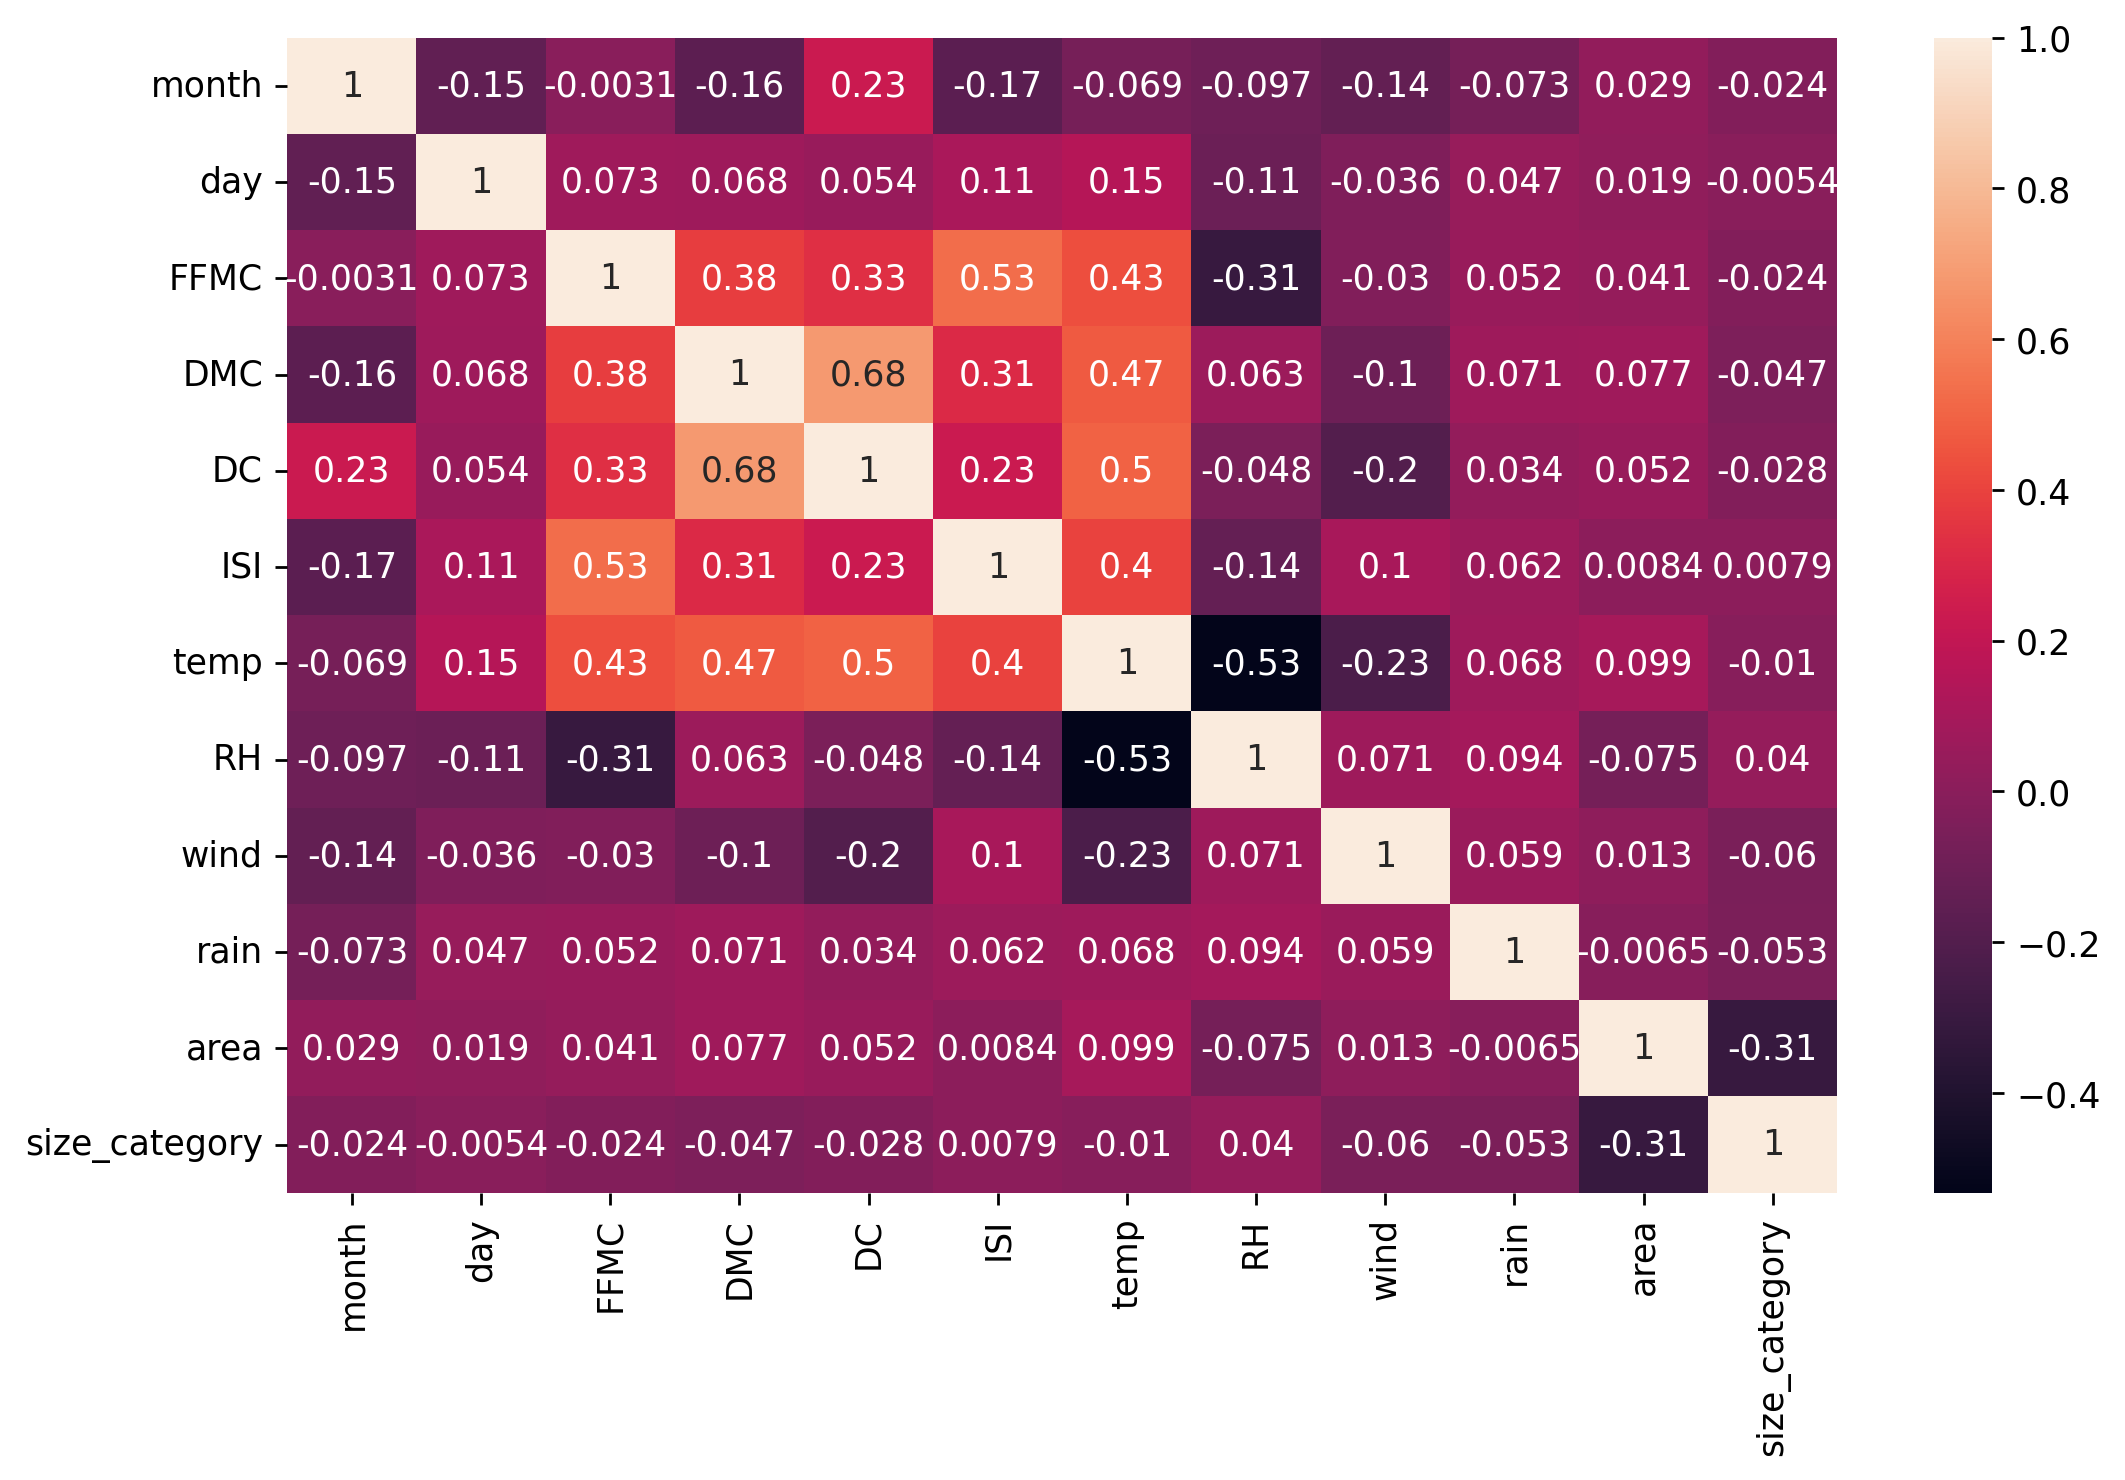

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [19]:
plt.rcParams['figure.figsize'] = 14,16
plt.rcParams['figure.dpi'] = 250
plt.show()

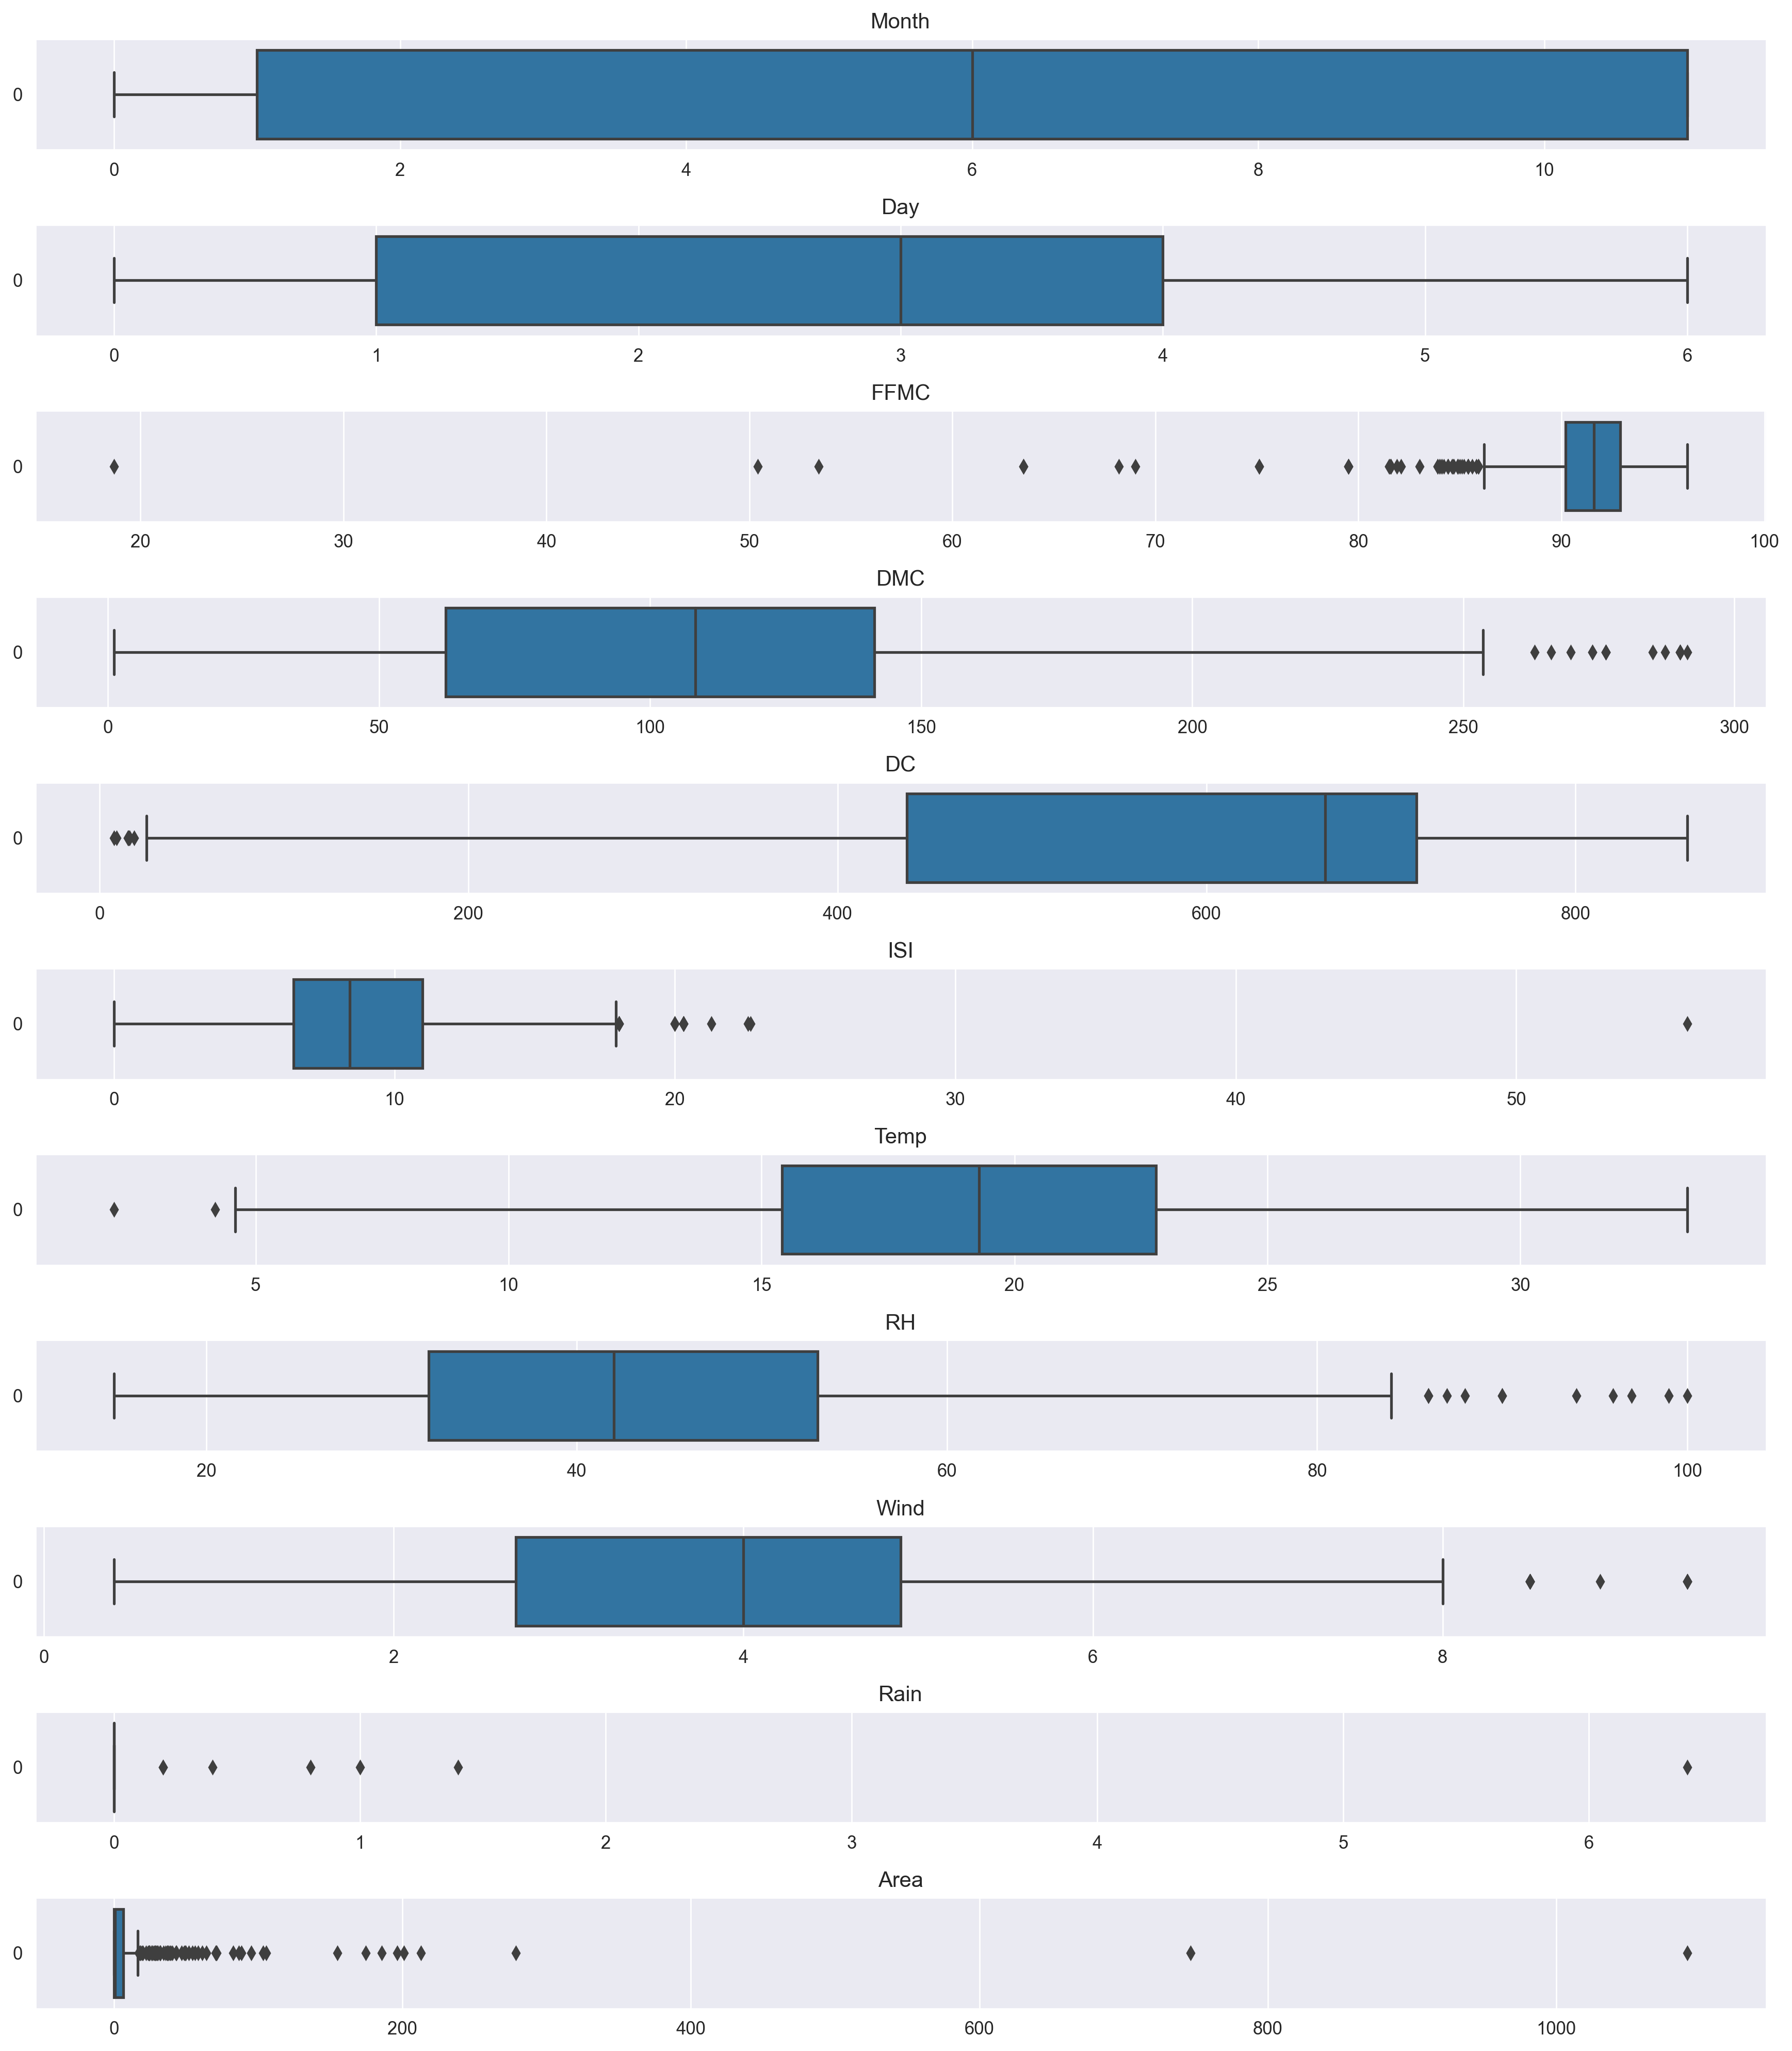

In [20]:
sns.set_style("darkgrid")

plt.subplot(11,1,1)
sns.boxplot(df['month'],orient='h')
plt.title('Month')

plt.subplot(11,1,2)
sns.boxplot(df['day'],orient='h')
plt.title('Day')

plt.subplot(11,1,3)
sns.boxplot(df['FFMC'],orient='h')
plt.title('FFMC')

plt.subplot(11,1,4)
sns.boxplot(df['DMC'],orient='h')
plt.title('DMC')

plt.subplot(11,1,5)
sns.boxplot(df['DC'],orient='h')
plt.title('DC')

plt.subplot(11,1,6)
sns.boxplot(df['ISI'],orient='h')
plt.title('ISI')

plt.subplot(11,1,7)
sns.boxplot(df['temp'],orient='h')
plt.title('Temp')

plt.subplot(11,1,8)
sns.boxplot(df['RH'],orient='h')
plt.title('RH')

plt.subplot(11,1,9)
sns.boxplot(df['wind'],orient='h')
plt.title('Wind')

plt.subplot(11,1,10)
sns.boxplot(df['rain'],orient='h')
plt.title('Rain')

plt.subplot(11,1,11)
sns.boxplot(df['area'],orient='h')
plt.title('Area')

plt.tight_layout()

In [21]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x,
                                                y,
                                                test_size=0.25,
                                                random_state=2)

In [24]:
svc = SVC()
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)
ypred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1.])

In [25]:
print(classification_report(ytest, ypred))
print(svc.score(xtrain,ytrain), svc.score(xtest,ytest))

              precision    recall  f1-score   support

         0.0       0.90      0.23      0.37        39
         1.0       0.75      0.99      0.85        89

    accuracy                           0.76       128
   macro avg       0.82      0.61      0.61       128
weighted avg       0.79      0.76      0.70       128

0.8083989501312336 0.7578125


In [26]:
df.shape

(509, 12)

In [27]:
df['size_category'].value_counts()

1.0    371
0.0    138
Name: size_category, dtype: int64

In [28]:
print("Before OverSampling, counts of label '1': {}".format(sum(ytrain == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(ytrain == 0)))

Before OverSampling, counts of label '1': 282
Before OverSampling, counts of label '0': 99 



***Imbalanced Data***

In [29]:
sm = SMOTE(random_state = 2)
xtrain_res, ytrain_res = sm.fit_resample(xtrain,ytrain)

In [30]:
print('After OverSampling, the shape of train_X: {}'.format(xtrain_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(ytrain_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(ytrain_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(ytrain_res == 0)))

After OverSampling, the shape of train_X: (564, 11)
After OverSampling, the shape of train_y: (564,) 

After OverSampling, counts of label '1': 282
After OverSampling, counts of label '0': 282


In [31]:
svc_smote = SVC()
svc_smote.fit(xtrain_res, ytrain_res)
ypred = svc_smote.predict(xtest)
ypred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1.])

In [32]:
print(classification_report(ytest,ypred))
print(svc_smote.score(xtrain_res,ytrain_res), svc_smote.score(xtest,ytest))

              precision    recall  f1-score   support

         0.0       0.76      0.64      0.69        39
         1.0       0.85      0.91      0.88        89

    accuracy                           0.83       128
   macro avg       0.81      0.78      0.79       128
weighted avg       0.82      0.83      0.82       128

0.8634751773049646 0.828125


In [33]:
print("Before Undersampling, counts of label '1': {}".format(sum(ytrain == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(ytrain == 0)))

Before Undersampling, counts of label '1': 282
Before Undersampling, counts of label '0': 99 



In [34]:
nr = NearMiss()
xtrain_miss, ytrain_miss = nr.fit_resample(xtrain, ytrain)

In [35]:
print('After Undersampling, the shape of train_X: {}'.format(xtrain_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(ytrain_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(ytrain_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(ytrain_miss == 0)))

After Undersampling, the shape of train_X: (198, 11)
After Undersampling, the shape of train_y: (198,) 

After Undersampling, counts of label '1': 99
After Undersampling, counts of label '0': 99


In [36]:
svc_nm = SVC()
svc_nm.fit(xtrain_miss, ytrain_miss)
ypred = svc_nm.predict(xtest)
ypred

array([1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0.])

In [37]:
print(classification_report(ytest,ypred))
print(svc_nm.score(xtrain_miss,ytrain_miss), svc_nm.score(xtest,ytest))

              precision    recall  f1-score   support

         0.0       0.39      0.72      0.51        39
         1.0       0.81      0.52      0.63        89

    accuracy                           0.58       128
   macro avg       0.60      0.62      0.57       128
weighted avg       0.68      0.58      0.59       128

0.8232323232323232 0.578125


**HyperParameter Tuning**

In [38]:
params = {
    'C': [0.1, 0.01, 0.001, 1, 2, 3, 4, 5],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : [0.1, 0.001, 1, 2, 3]
}

In [39]:
grid = GridSearchCV(svc, param_grid=params, cv=5,scoring='accuracy')
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 0.001, 1, 2, 3, 4, 5],
                         'gamma': [0.1, 0.001, 1, 2, 3],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [40]:
grid.best_score_

0.9658236500341764

In [41]:
grid.best_params_

{'C': 5, 'gamma': 0.1, 'kernel': 'linear'}

In [42]:
svc_hp = SVC(C=5, gamma=0.1, kernel='linear')
svc_hp.fit(xtrain, ytrain)
ypred = svc_hp.predict(xtest)
ypred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1.])

In [43]:
print(classification_report(ytest,ypred))
print(svc_hp.score(xtrain,ytrain), svc_hp.score(xtest,ytest))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        39
         1.0       0.96      1.00      0.98        89

    accuracy                           0.97       128
   macro avg       0.98      0.95      0.96       128
weighted avg       0.97      0.97      0.97       128

0.979002624671916 0.96875


**This model is better than the all model because it classifies better and also the recall value of minority class is 90 %.  I’ll go ahead and use that model!**

---------------------------------------------------------------------------------------------------------------------------

# (2) Salary Data 

In [44]:
df_train = pd.read_csv("D:\Assignment\Support Vector machines\SalaryData_Train(1).csv")

In [45]:
df_test = pd.read_csv("D:\Assignment\Support Vector machines\SalaryData_Test(1).csv")

In [46]:
df_train.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [47]:
df_test.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [48]:
df_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [49]:
df_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [50]:
df_train.shape

(30161, 14)

In [51]:
df_test.shape

(15060, 14)

In [52]:
df_train.duplicated().sum()

3258

In [53]:
df_train[df_train.duplicated(keep=False)]

age workclass      education  educationno        maritalstatus  \
12      23   Private      Bachelors           13        Never-married   
16      32   Private        HS-grad            9        Never-married   
19      40   Private      Doctorate           16   Married-civ-spouse   
25      19   Private        HS-grad            9        Never-married   
27      49   Private        HS-grad            9   Married-civ-spouse   
...    ...       ...            ...          ...                  ...   
30110   47   Private        HS-grad            9   Married-civ-spouse   
30118   20   Private        HS-grad            9        Never-married   
30132   22   Private   Some-college           10        Never-married   
30157   40   Private        HS-grad            9   Married-civ-spouse   
30159   22   Private        HS-grad            9        Never-married   

               occupation relationship    race      sex  capitalgain  \
12           Adm-clerical    Own-child   White   Female            0   
16      Machine-op-inspct    Unmarried   White     Male            0   
19         Prof-specialty      Husband   White     Male            0   
25           Craft-repair    Own-child   White     Male            0   
27           Craft-repair      Husband   White     Male            0   
...                   ...          ...     ...      ...          ...   
30110        Craft-repair      Husband   White     Male            0   
30118   Machine-op-inspct    Own-child   White     Male            0   
30132        Adm-clerical    Own-child   White     Male            0   
30157   Machine-op-inspct      Husband   White     Male            0   
30159        Adm-clerical    Own-child   White     Male            0   

       capitalloss  hoursperweek          native  Salary  
12               0            30   United-States   <=50K  
16               0            40   United-States   <=50K  
19               0            60   United-States    >50K  
25               0            40   United-States   <=50K  
27               0            40   United-States   <=50K  
...            ...           ...             ...     ...  
30110            0            40   United-States   <=50K  
30118            0            40   United-States   <=50K  
30132            0            40   United-States   <=50K  
30157            0            40   United-States    >50K  
30159            0            20   United-States   <=50K  

[5218 rows x 14 columns]

In [54]:
df_train.drop_duplicates(inplace=True)

In [55]:
df_train.duplicated().sum()

0

In [56]:
df_test.duplicated().sum()

930

In [57]:
df_test[df_test.duplicated(keep=False)]

age workclass      education  educationno        maritalstatus  \
29      26   Private        HS-grad            9             Divorced   
33      20   Private        HS-grad            9        Never-married   
37      29   Private           11th            7   Married-civ-spouse   
44      18   Private   Some-college           10        Never-married   
49      21   Private   Some-college           10        Never-married   
...    ...       ...            ...          ...                  ...   
15043   51   Private        HS-grad            9   Married-civ-spouse   
15044   22   Private   Some-college           10        Never-married   
15049   32   Private        HS-grad            9   Married-civ-spouse   
15052   31   Private        HS-grad            9   Married-civ-spouse   
15053   25   Private        HS-grad            9        Never-married   

               occupation relationship    race      sex  capitalgain  \
29        Exec-managerial    Unmarried   White   Female            0   
33           Craft-repair    Own-child   White     Male            0   
37          Other-service      Husband   White     Male            0   
44          Other-service    Own-child   White     Male            0   
49           Adm-clerical    Own-child   White   Female            0   
...                   ...          ...     ...      ...          ...   
15043        Craft-repair      Husband   White     Male            0   
15044        Craft-repair    Own-child   White     Male            0   
15049   Handlers-cleaners      Husband   White     Male            0   
15052        Craft-repair      Husband   White     Male            0   
15053       Other-service    Own-child   White   Female            0   

       capitalloss  hoursperweek          native  Salary  
29               0            40   United-States   <=50K  
33               0            40   United-States   <=50K  
37               0            40   United-States   <=50K  
44               0            20   United-States   <=50K  
49               0            40   United-States   <=50K  
...            ...           ...             ...     ...  
15043            0            40   United-States   <=50K  
15044            0            40   United-States   <=50K  
15049            0            40   United-States   <=50K  
15052            0            40   United-States   <=50K  
15053            0            40   United-States   <=50K  

[1610 rows x 14 columns]

In [58]:
df_test.drop_duplicates(inplace=True)

In [59]:
df_test.duplicated().sum()

0

In [60]:
# Training data
xtrain = df_train.iloc[:,:-1]
ytrain = df_train.iloc[:,-1]

# Testing data
xtest = df_test.iloc[:,:-1]
ytest = df_test.iloc[:,-1]

In [61]:
cat_cols = xtrain.select_dtypes(object).columns
cat_cols

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native'],
      dtype='object')

In [62]:
oe = OrdinalEncoder()
xtrain[cat_cols] = oe.fit_transform(xtrain[cat_cols])
xtrain

age  workclass  education  educationno  maritalstatus  occupation  \
0       39        5.0        9.0           13            4.0         0.0   
1       50        4.0        9.0           13            2.0         3.0   
2       38        2.0       11.0            9            0.0         5.0   
3       53        2.0        1.0            7            2.0         5.0   
4       28        2.0        9.0           13            2.0         9.0   
...    ...        ...        ...          ...            ...         ...   
30154   53        2.0       12.0           14            2.0         3.0   
30155   22        2.0       15.0           10            4.0        10.0   
30156   27        2.0        7.0           12            2.0        12.0   
30158   58        2.0       11.0            9            6.0         0.0   
30160   52        3.0       11.0            9            2.0         3.0   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  
0               1.0   4.0  1.0         2174            0            40    37.0  
1               0.0   4.0  1.0            0            0            13    37.0  
2               1.0   4.0  1.0            0            0            40    37.0  
3               0.0   2.0  1.0            0            0            40    37.0  
4               5.0   2.0  0.0            0            0            40     4.0  
...             ...   ...  ...          ...          ...           ...     ...  
30154           0.0   4.0  1.0            0            0            40    37.0  
30155           1.0   4.0  1.0            0            0            40    37.0  
30156           5.0   4.0  0.0            0            0            38    37.0  
30158           4.0   4.0  0.0            0            0            40    37.0  
30160           5.0   4.0  0.0        15024            0            40    37.0  

[26903 rows x 13 columns]

In [63]:
cat_cols = xtest.select_dtypes(object).columns
cat_cols

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native'],
      dtype='object')

In [64]:
oe = OrdinalEncoder()
xtest[cat_cols] = oe.fit_transform(xtest[cat_cols])
xtest

age  workclass  education  educationno  maritalstatus  occupation  \
0       25        2.0        1.0            7            4.0         6.0   
1       38        2.0       11.0            9            2.0         4.0   
2       28        1.0        7.0           12            2.0        10.0   
3       44        2.0       15.0           10            2.0         6.0   
4       34        2.0        0.0            6            4.0         7.0   
...    ...        ...        ...          ...            ...         ...   
15055   33        2.0        9.0           13            4.0         9.0   
15056   39        2.0        9.0           13            0.0         9.0   
15057   38        2.0        9.0           13            2.0         9.0   
15058   44        2.0        9.0           13            0.0         0.0   
15059   35        3.0        9.0           13            2.0         3.0   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  
0               3.0   2.0  1.0            0            0            40    37.0  
1               0.0   4.0  1.0            0            0            50    37.0  
2               0.0   4.0  1.0            0            0            40    37.0  
3               0.0   2.0  1.0         7688            0            40    37.0  
4               1.0   4.0  1.0            0            0            30    37.0  
...             ...   ...  ...          ...          ...           ...     ...  
15055           3.0   4.0  1.0            0            0            40    37.0  
15056           1.0   4.0  0.0            0            0            36    37.0  
15057           0.0   4.0  1.0            0            0            50    37.0  
15058           3.0   1.0  1.0         5455            0            40    37.0  
15059           0.0   4.0  1.0            0            0            60    37.0  

[14130 rows x 13 columns]

In [65]:
sns.pairplot(xtrain)

<AxesSubplot: >

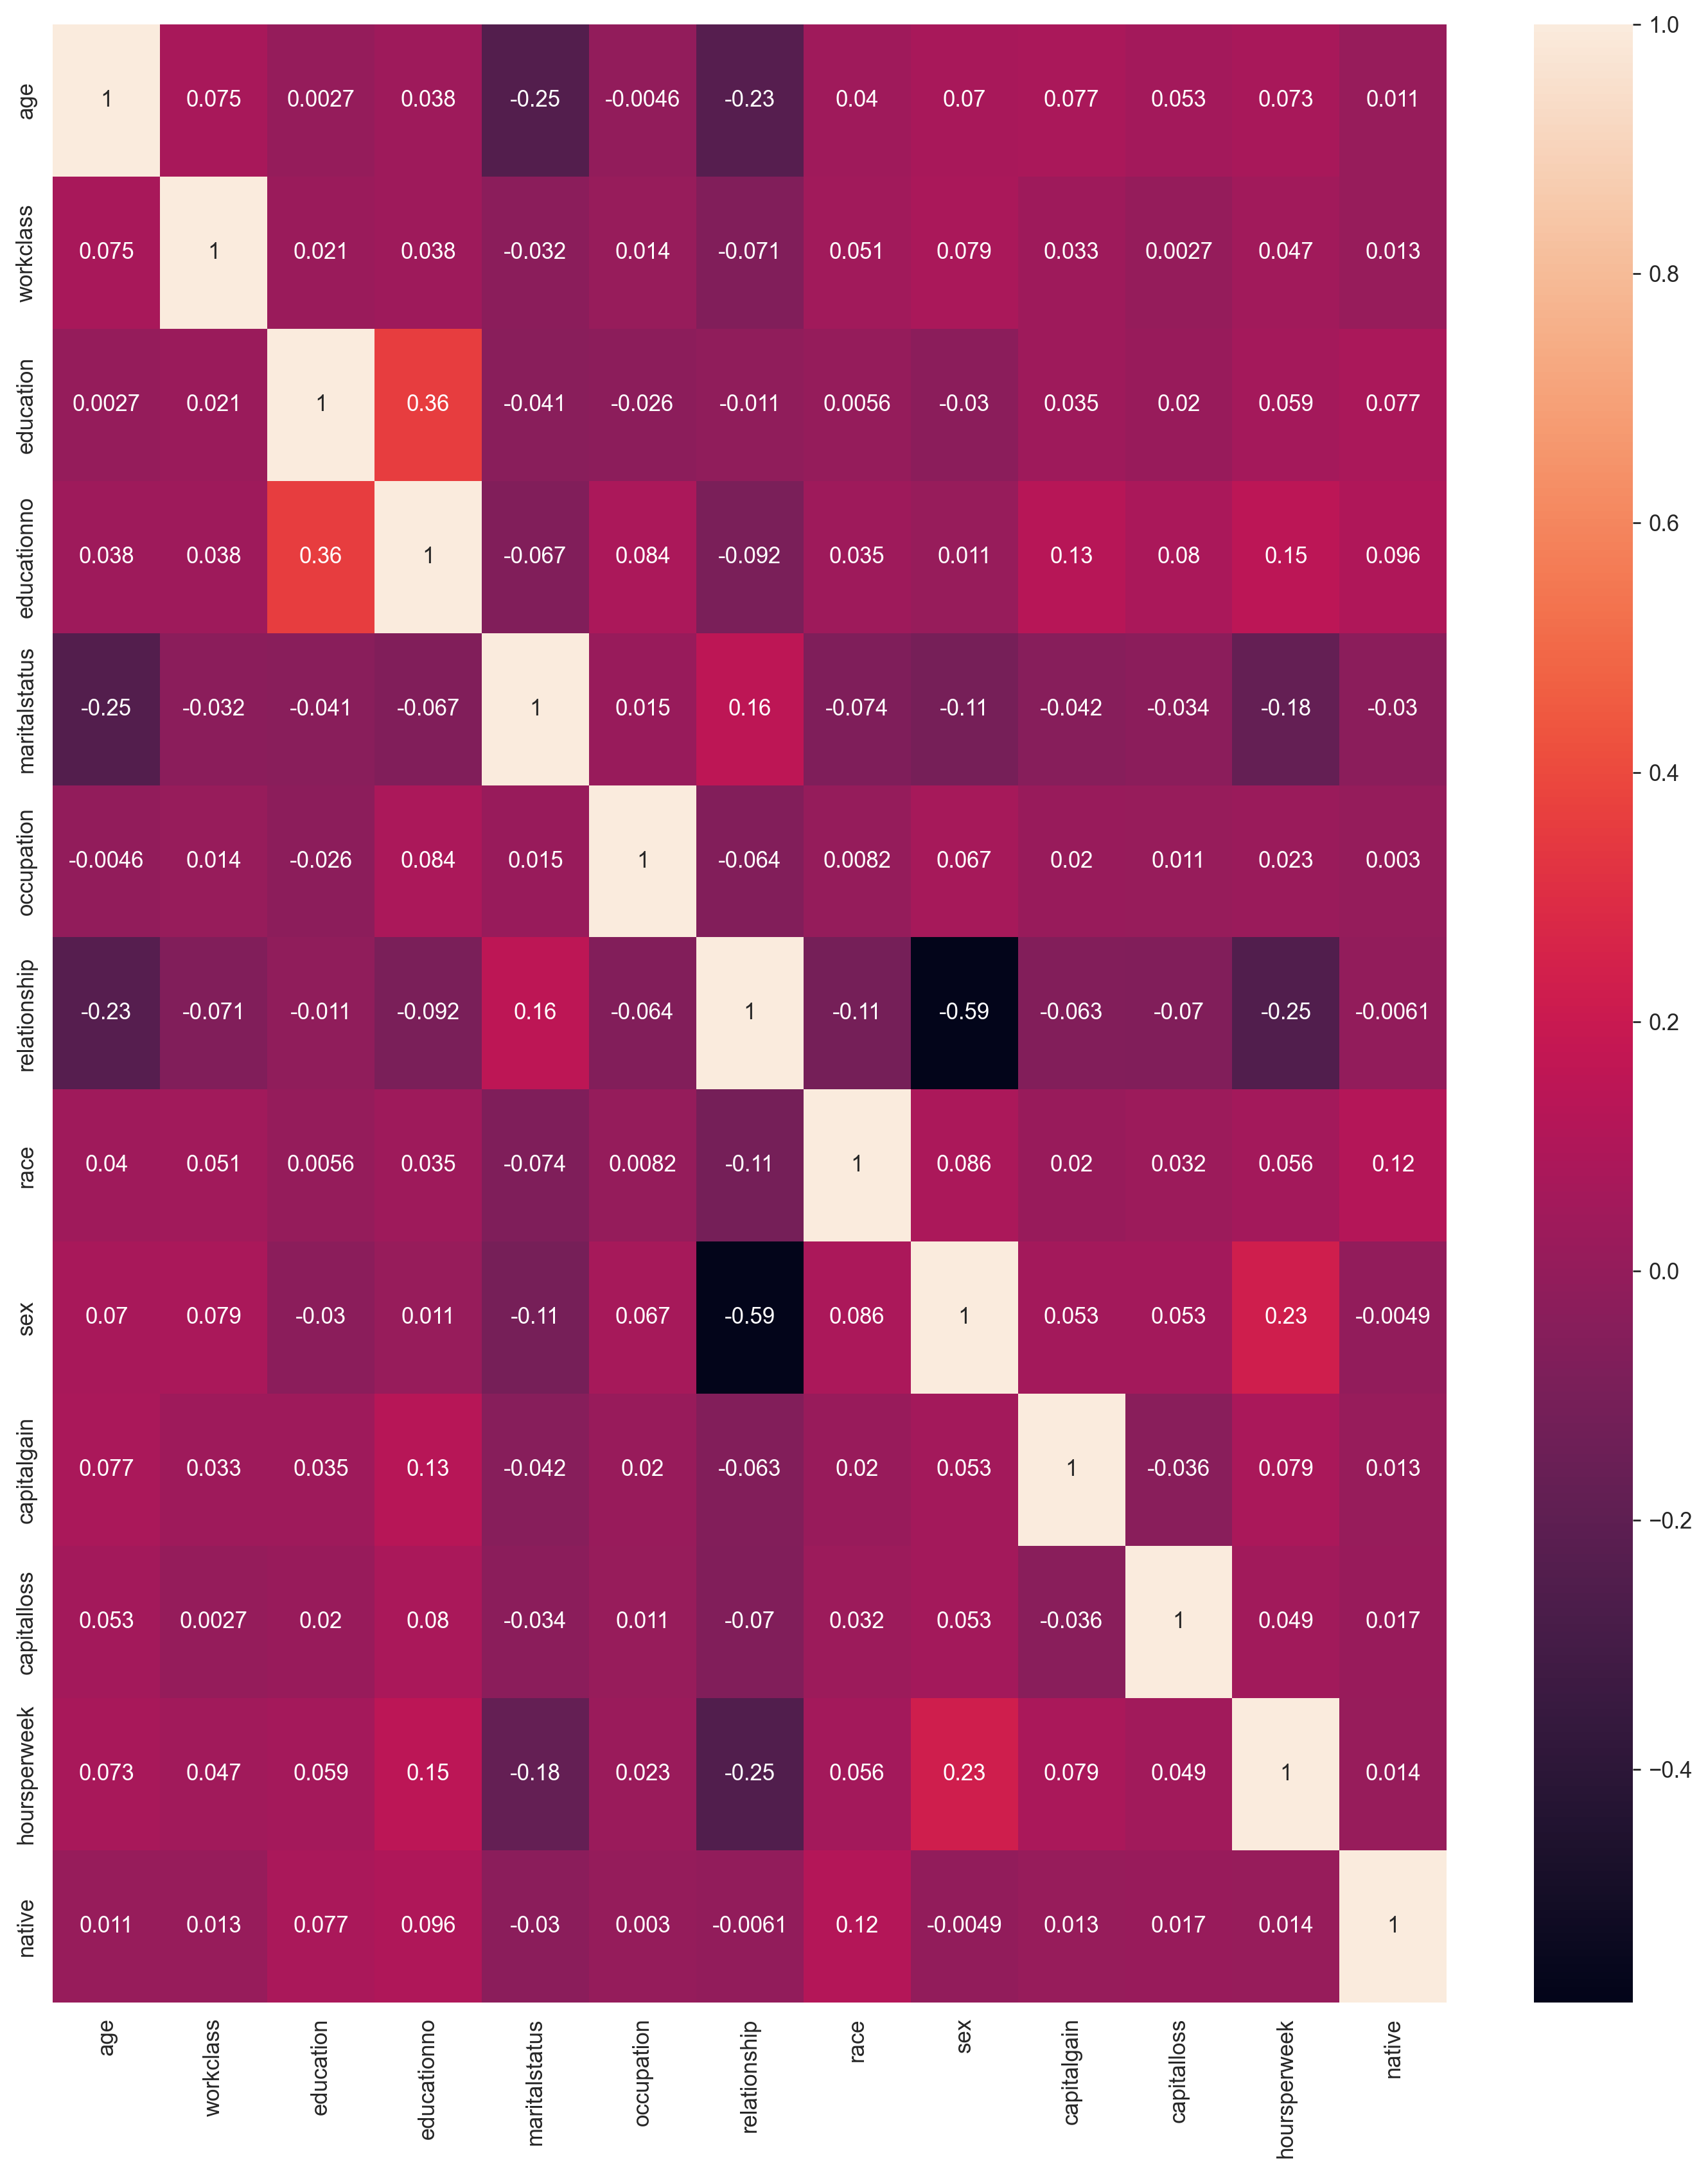

In [66]:
sns.heatmap(xtrain.corr(),annot=True)

In [67]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)

In [68]:
sc = StandardScaler()
xtest = sc.fit_transform(xtest)

In [69]:
svc = SVC()
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)
ypred

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' >50K'],
      dtype=object)

In [70]:
print(classification_report(ytest,ypred))
print(svc.score(xtrain,ytrain), svc.score(xtest,ytest))

              precision    recall  f1-score   support

       <=50K       0.86      0.94      0.90     10620
        >50K       0.76      0.55      0.64      3510

    accuracy                           0.84     14130
   macro avg       0.81      0.75      0.77     14130
weighted avg       0.84      0.84      0.84     14130

0.8465970337880534 0.8440198159943383


**Generalized model**